### Exercise 02.1
- Compute the following 1D integral via Monte Carlo 
$$I = \int_0^1 \frac{\pi}{2}\cos(\pi x/2) dx = 1$$

1. sampling a uniform distribution in $[0,1]$
2. using importance sampling (i.e. sampling a non-uniform probability in $[0,1]$)

<span style="color:red">Show a picture of both your estimations of $I$</span> and their uncertainties with a large number of *throws* $M$ (e.g. $M\ge 10^4$) as a function of the number of blocks, $N$</font>.

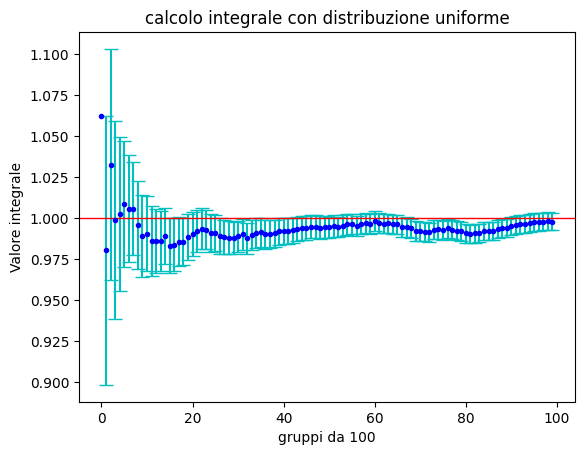

In [1]:
import matplotlib.pyplot as plt
import numpy as np

integral = []
err = []

with open(r'C:\Users\Utente\Documents\Python Scripts\lezione_2/integral_err.txt', 'r') as file:
    for line in file:
        values = line.split(',')
        integral.append(float(values[0]))
        err.append(float(values[1]))

x = np.arange(len(integral)) # Definizione delle posizioni delle barre sull'asse x

plt.errorbar(x, integral, yerr=err, fmt='o', capsize=5, color='blue', ecolor='c', markersize=3)
plt.axhline(y=1, color='red', linestyle='solid', linewidth=1)
plt.xlabel('gruppi da 100')
plt.ylabel('Valore integrale')
plt.title('calcolo integrale con distribuzione uniforme')

plt.show()

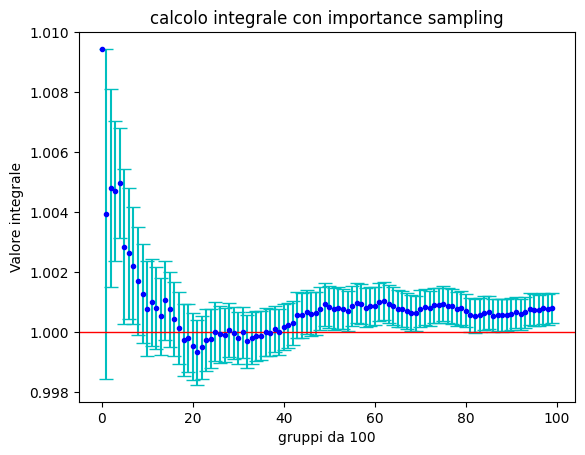

In [2]:
integral_bet = []
err_bet = []

with open(r'C:\Users\Utente\Documents\Python Scripts\lezione_2/integral_parabola_err.txt', 'r') as file:
    for line in file:
        values = line.split(',')
        integral_bet.append(float(values[0]))
        err_bet.append(float(values[1]))

x2 = np.arange(len(integral_bet)) # Definizione delle posizioni delle barre sull'asse x

plt.errorbar(x2, integral_bet, yerr=err_bet, fmt='o', capsize=5, color='blue', ecolor='c', markersize=3)
plt.axhline(y=1, color='red', linestyle='solid', linewidth=1)
plt.xlabel('gruppi da 100')
plt.ylabel('Valore integrale')
plt.title('calcolo integrale con importance sampling')

plt.show()

Errore sul calcolo del valore medio ridotto di un fattore 10

### Exercise 02.2
- <span style="color:red">3D Random Walks (RW) on a cubic lattice and in the continuum:</span> Repeat many times (e.g. say $10^4$) the simulation of a random walk in 3D always starting at the origin

1. on a cubic lattice with lattice constant $a=1$; at each discrete time the walker makes a forward or backward step of length equal to $a$ in one of the 3 principal directions of the lattice: $x$, $y$ or $z$
2. in the continuum; at each discrete time the walker makes a step of length equal to $a(=1)$ along a **random direction** obtained by sampling **uniformly** the solid angle: $\theta \in [0,\pi]$ and $\phi \in [0,2\pi]$

<span style="color:red">Show a picture of $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ for both RWs</span>, with their statistical uncertainties, as function of the step $i\in [0,10^2]$.

Suggestion: divide your $M$ throws into a reasonable number of blocks, compute $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ as function of the step $i\in [0,10^2]$ in each block and use these values (for fixed $i$) to obtain the average value and its statistical uncertainty.

Note that you could try to fit both results with a function like $f(N)=k\sqrt{N}$. Do your results indicate a diffusive behavior?

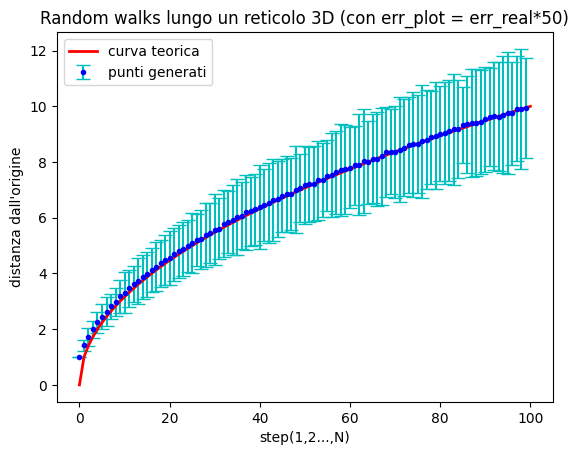

In [9]:
radius_lattice = []
err_lattice = []

with open(r'C:\Users\Utente\Documents\Python Scripts\lezione_2/radius_lattice_err.txt', 'r') as file:
    for line in file:
        values = line.split(',')
        radius_lattice.append(float(values[0]))
        err_lattice.append(float(values[1]))

err_lattice_scaled = np.array(err_lattice) * 50

x = np.arange(len(radius_lattice)) # Definizione delle posizioni delle barre sull'asse x
t = np.linspace(0, 100, 100)


plt.errorbar(x, radius_lattice, xerr=None, yerr=err_lattice_scaled, fmt='o', capsize=5, color='blue', ecolor='c', markersize=3, label='punti generati')
plt.plot(t, np.sqrt(t), color='red', linewidth=2, label= 'curva teorica')
plt.xlabel('step(1,2...,N)')
plt.ylabel('distanza dall\'origine')
plt.title('Random walks lungo un reticolo 3D (con err_plot = err_real*50)')
plt.legend()

plt.show()

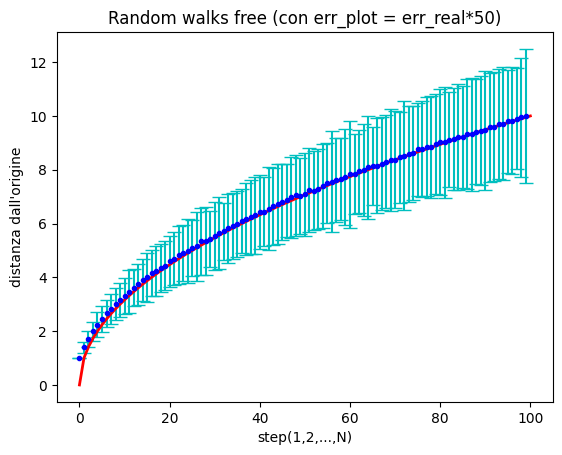

In [11]:
radius_free = []
err_free = []

with open(r'C:\Users\Utente\Documents\Python Scripts\lezione_2/radius_free_err.txt', 'r') as file:
    for line in file:
        values = line.split(',')
        radius_free.append(float(values[0]))
        err_free.append(float(values[1]))

err_free_scaled = np.array(err_free) * 50

x2 = np.arange(len(radius_free)) # Definizione delle posizioni delle barre sull'asse x
t = np.linspace(0, 100, 100)


plt.errorbar(x2, radius_free, xerr=None, yerr=err_free_scaled, fmt='o', capsize=5, color='blue', ecolor='c', markersize=3)
plt.plot(t, np.sqrt(t), color='red', linewidth=2)
plt.xlabel('step(1,2,...,N)')
plt.ylabel('distanza dall\'origine')
plt.title('Random walks free (con err_plot = err_real*50)')

plt.show()

L'andamento è evidentemente compatibile con quello atteso( sqrt(N) ). Gli errori sono stati tutti moltiplicati di un fattore 50 per renderli visibili